Please enter a (m/s^2): 9.8
<class 'float'>
Please enter v initial (m/s): 0
<class 'float'>
Please enter h initial (m/s^2): 100
<class 'float'>
Calculated time to land: 149.99
Numerical time to land: 149.99


<IPython.core.display.Javascript object>


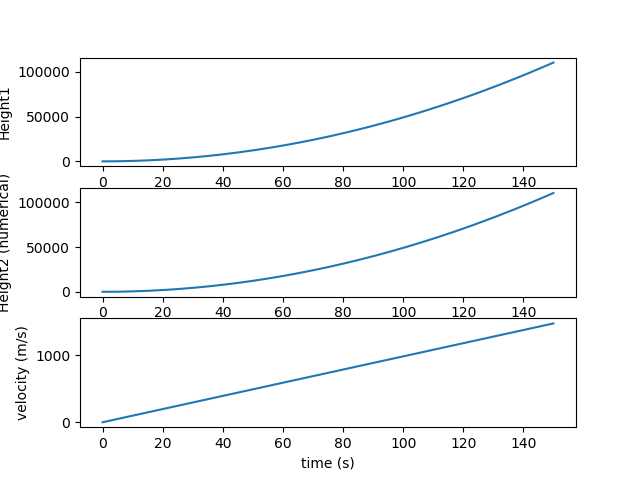

In [2]:
%matplotlib notebook
from numpy import trapz
import numpy as np
import matplotlib.pyplot as ptl


def velocity(v0,a,t):
    vel = np.empty_like(t)
    vel = v0 + a*t
    return vel
def height(h0,v0,a,t):
    hei = np.empty_like(t)
    # calculate using y = y0 + v0*t + (1/2)*a*t^2
    hei = h0 + v0*t + 0.5*a*np.power(t,2)
    return hei
a = -9.8
v0 = 0
h0 = 100
#Getting user inputs
a = float(input("Please enter a (m/s^2): "))
print(type(a))
v0 = float(input("Please enter v initial (m/s): "))
print(type(v0))
h0 = float(input("Please enter h initial (m/s^2): "))
print(type(h0))
t = np.arange(0,150,0.01)
v = v0 + a*t
h1 = height(h0,v0,a,t)
index = 0
 #h2 is numerical integration
h2 = np.empty_like(t)
#numerical integration method
while index < len(v)-1:
    y1 = v[index]
    y2 = v[index+1]
    if index >0:
        h2[index] = h2[index-1]+trapz([y1,y2],dx = 0.01)
    else:
        h2[index] = h0+trapz([y1,y2],dx = 0.1)
    index = index+1
h2[index] = h2[index-1]+trapz([v[index-1],v[index]],dx = 0.01)
t1 = t[h1>=0]
h1 = h1[:len(t1)]
t2 = t[h2>=0]
h2 = h2[:len(t2)]
v = v[:len(t1)]
print("Calculated time to land: "+str(t1[len(t1)-1]))
print("Numerical time to land: "+str(t2[len(t2)-1]))
#plot h1 (calculated)
ptl.subplot(3,1,1)
ptl.plot(t1,h1)
ptl.ylabel('Height1')
#plot h2 numerical
ptl.subplot(3,1,2)
ptl.plot(t2,h2)
ptl.ylabel('Height2 (numerical)')
#plot velocity
ptl.subplot(3,1,3)
ptl.plot(t1,v)
ptl.ylabel('velocity (m/s)')
ptl.xlabel('time (s)')
ptl.show()


